<h1 style="text-align:center;"><a href="https://www.kaggle.com/datasets/denkuznetz/housing-prices-regression">Dataset 1 (housing prices)</a></h1>

Group Number: #127
<br>
Names: Alex Oprea, Kristen Duong
<br>
Student Numbers: 300230368, 300240425

# INTRODUCTION

This notebook will perform an empirical study using a linear regression model to predict housing prices. The dataset being used for the study in part (f) will be one-hot encoded. After conducting the empirical study we will compare the results of each of our experiments (i.e. our encoded dataset with/without outliers and with/without aggregation) to determine which experiment was best at predicting the price of a property.

To use the notebook, click the "Run All Cells" button (i.e., run all cells in the order that they are written in). Also ensure that you have Pandas, Numpy, Seaborn, Matplotlib, and scikit-learn installed.

# DESCRIPTION

<i>Dataset name:</i> Housing Prices Regression 🏘️
<br>
<i>Author:</i> Den Kuznetz
<br>
<i>Purpose:</i> This dataset is to be used to build a regression model and predict property housing prices. This is done by using the other features in the dataset as inputs. The model built should be able to take the relationship between these inputs and what is to be predicted (Price) and provide an accurate prediction for the unseen price data.
<br>
<i>Domain:</i> Real Estate Industry 
<br>
<i>Audience:</i> Housing realtors and people looking to buy a new home may gain insight into the housing market through this dataset. Those interested in machine learning and regression analysis may also find it useful as they can use it to learn how to build good predictive models.
<br>
<i>Shape:</i> 503 rows, 12 columns

<i>Categorical Attributes:</i>
- Num_Bedrooms: The number of bedrooms in the property
- Num_Bathrooms: The number of bathrooms in the property
- Num_Floors: The number of floors in the property
- Has_Garden: Yes, if the property has a garden (1) or no, if the property doesn`t have a garden (0)
- Has_Pool: Yes, if the property has a pool (1) or no, if the property doesn`t have a pool (0)

<i>Numerical Attributes:</i>
- Square_Feet: The property`s area measured in square meters
- Year_Built: The year when the property was built
- Garage_Size: The garage size measured in square meters
- Location_Score: The quality of the neigbourhood, scored from 0 to 10 (higher scores indicate a better neighbourhood)
- Distance_to_Center: The distance from the property to the city center, measured in kilometers
- Price: The target price of the property (value to predict)



## SET UP

In [460]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import ElasticNet

# load csv files from github
housing = pd.read_csv('https://raw.githubusercontent.com/kkristene3/CSI4142_Datasets/refs/heads/main/real_estate_dataset.csv')

## (a) clean dataset

In [461]:
print("Cleaning Dataset Outcome:")
# -------------------------------------------------------------- DATA TYPE CHECKER --------------------------------------------------------------
# the expected data types for each attribute
expected_types = {
    'Square_Feet': float,
    'Num_Bedrooms': int,
    'Num_Bathrooms': int,
    'Num_Floors': int,
    'Year_Built': int,
    'Has_Garden': int,
    'Has_Pool': int,
    'Garage_Size': int,
    'Location_Score': float,
    'Distance_to_Center': float,
    'Price': float
}

# check each column that it is correct data type
all_correct = all(
    housing[column].apply(lambda x: isinstance(x, dtype)).all()
    for column, dtype in expected_types.items()
)

# Print result
if not all_correct:
    print(False)
else:
    print("Data Type Check: Pass")

# -------------------------------------------------------------- RANGE CHECKER --------------------------------------------------------------
# we will ensure that none of the numerical values are negative
# columns to check
num_cols = ["Square_Feet", "Year_Built", "Garage_Size", "Location_Score", "Distance_to_Center", "Price"]
found_negatives = False # boolean if negatives in any column are found

# loop through the columns to check for any negatives
for col in num_cols:
    # track index if the value is negative
    indices = housing[housing[col] < 0].index

    # if indices array is not empty (found a negative value), print message
    if not indices.empty:
        print("Column", col, "has negative values at index", indices.tolist())
        found_negatives = True # change boolean to flag that a negative was found
        
# if no negatives, checker passed
if not found_negatives:
    print("Range Checker: Pass")

# --------------------------------------------------------- FORMAT CHECKER (no formats needed to be checked) ---------------------------------------------------------
print("Format Checker:  No Formats needed to be checked.")

# -------------------------------------------------------------- CONSISTENCY CHECKER --------------------------------------------------------------
print("Consistency Check: N/A, as we do not have enough domain knowledge to know what is an acceptable value for one attribute,"
      " given another attribute.")

# -------------------------------------------------------------- UNIQUENESS CHECKER --------------------------------------------------------------
# attributes that must have unique values: ID
noDuplicates = 0

# check all values in ID column for any duplicates, print message based on result
if housing["ID"].duplicated().any():
    print("Uniqueness Checker: There are duplicates in ID!")
else:
    print("Uniqueness Checker: Pass")

# -------------------------------------------------------------- PRESENCE CHECKER --------------------------------------------------------------
# sum up the number of null values in each column
missing_values = housing.isnull().sum()

# print results
if missing_values.any():
    print(missing_values[missing_values > 0])
else:
    print("Presence Check: Pass")

# -------------------------------------------------------------- LENGTH CHECKER --------------------------------------------------------------
# check that the years are 4 digits
years_length = 4

# check years string length
invalid_years = housing[housing["Year_Built"].astype(str).str.len() != 4]

# output result
if len(invalid_years) != 0:
    print("Year_Built are of invalid length:", invalid_years)
else:
    print("Length Checker: Pass")

# -------------------------------------------------------------- LOOK UP CHECKER --------------------------------------------------------------
print("Look-up Checker: Given that all values are either int or float, they do not have a limited set of values that can be written in their cell.")

# ----------------------------------------------------------- EXACT DUPLICATES CHECKER -----------------------------------------------------------
# find any duplicates
duplicates = housing[housing.duplicated(subset=housing.columns.difference(["ID"]), keep=False)]

# check length of duplicates array to see if any were found in the dataset
if len(duplicates) != 0:
    print("There are duplicates!")
else:
    print("Exact Duplicates Checker: Pass")

# ----------------------------------------------------------- NEAR DUPLICATES CHECKER -----------------------------------------------------------
print("Near Duplicates: Will not check for near duplicates as it is possible to have multiple properties closely located. If there are homes near each other (same neighbourhood), "
      "it is possible to have similar pricing, similar distancing and location score (geographically in same neighbourhood), same year built "
      "(if all homes in neighbourhood were built at same time) and similar housing layouts (number of bedrooms, bathrooms, and sizing).")

Cleaning Dataset Outcome:
Data Type Check: Pass
Range Checker: Pass
Format Checker:  No Formats needed to be checked.
Consistency Check: N/A, as we do not have enough domain knowledge to know what is an acceptable value for one attribute, given another attribute.
Uniqueness Checker: There are duplicates in ID!
Presence Check: Pass
Length Checker: Pass
Look-up Checker: Given that all values are either int or float, they do not have a limited set of values that can be written in their cell.
Exact Duplicates Checker: Pass
Near Duplicates: Will not check for near duplicates as it is possible to have multiple properties closely located. If there are homes near each other (same neighbourhood), it is possible to have similar pricing, similar distancing and location score (geographically in same neighbourhood), same year built (if all homes in neighbourhood were built at same time) and similar housing layouts (number of bedrooms, bathrooms, and sizing).


## (b) categorical feature encoding

In [462]:
# the categorical attributes (exclude binary attributes)
categoricals = ['Num_Bedrooms', 'Num_Bathrooms', 'Num_Floors']

# apply one-hot encoding (show as 0/1 int instead of True/False)
one_hot_encoded = pd.get_dummies(housing, columns=categoricals).astype(int)

# print
print(one_hot_encoded.head())

   ID  Square_Feet  Year_Built  Has_Garden  Has_Pool  Garage_Size  \
0   1          143        1967           1         1           48   
1   2          287        1949           0         1           37   
2   3          232        1923           1         0           14   
3   4          199        1918           0         0           17   
4   5           89        1999           1         0           34   

   Location_Score  Distance_to_Center   Price  Num_Bedrooms_1  Num_Bedrooms_2  \
0               8                   5  602134               1               0   
1               6                  10  591425               1               0   
2               2                   6  464478               1               0   
3               2                   8  583105               0               0   
4               1                  14  619879               0               0   

   Num_Bedrooms_3  Num_Bedrooms_4  Num_Bedrooms_5  Num_Bathrooms_1  \
0               0           

## (c) EDA and Outlier Detection

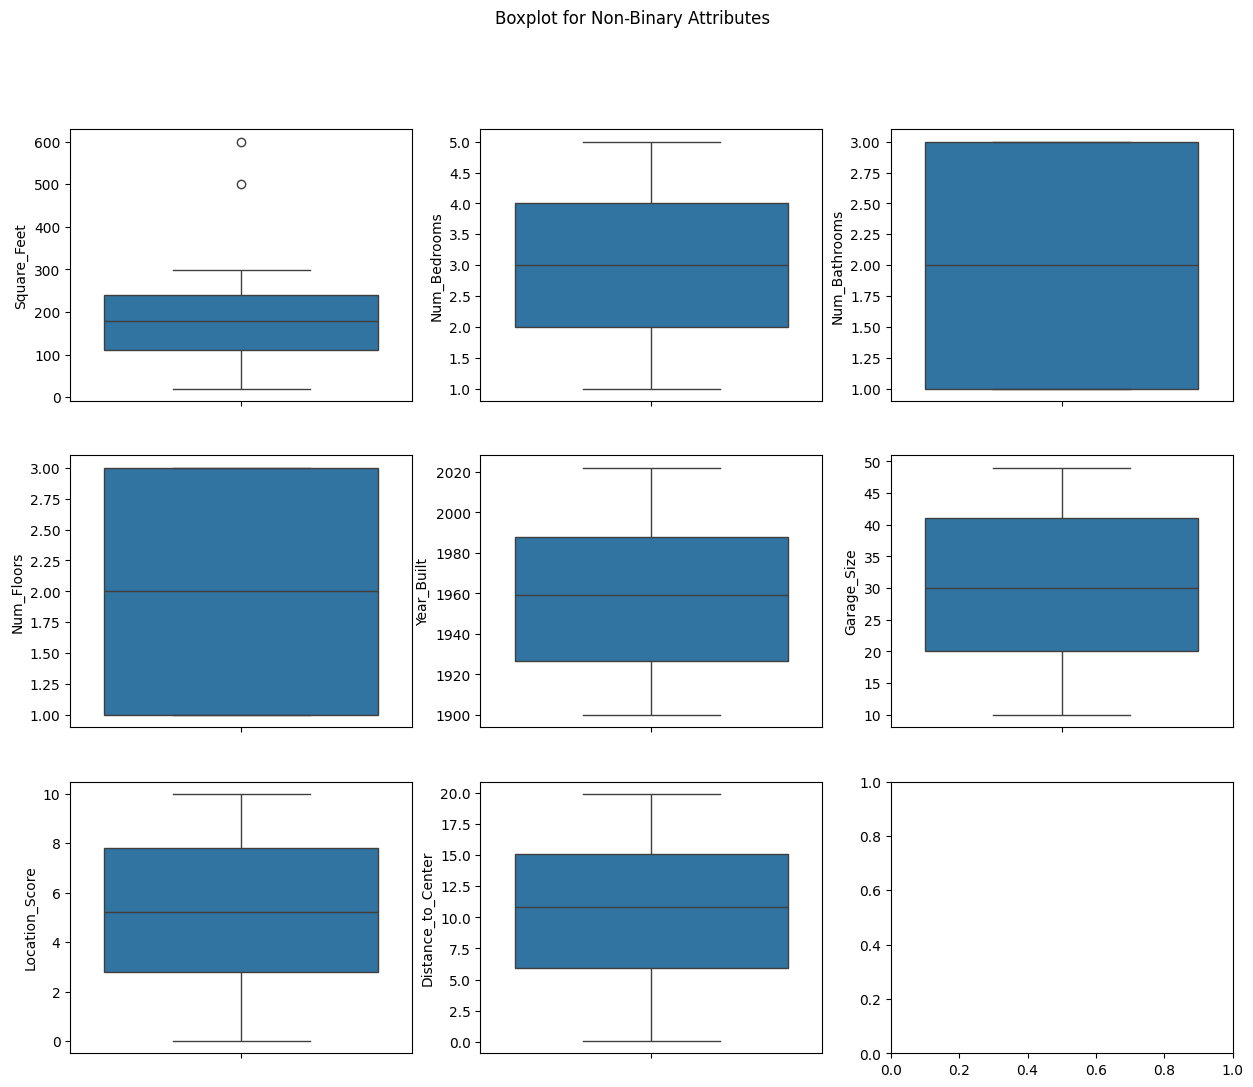

In [463]:
# ------------------------------------------- (ii) EDA to visualize data -------------------------------------------
# outliers were added to Square_Feet attribute

# ignore attributes with binary values; also ignore ID column and Price
housing_cols = housing.drop(columns=["ID", "Has_Garden", "Has_Pool", "Price"], errors="ignore")

# calculate number of rows needed to display all attributes
num_features = len(housing_cols.columns)
num_rows = (num_features // 3) + (num_features % 3 > 0)

# create each sub boxplot
fig, ax = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 4))
ax = ax.flatten()

# plot each attribute's boxplot
for i, col in enumerate(housing_cols.columns):
    sns.boxplot(y=housing_cols[col], ax=ax[i])
    axes[i].set_title(col)

# title of figure
fig.suptitle("Boxplot for Non-Binary Attributes")

# show plot
plt.show()


In [464]:
# ------------------------------------------- (i) Local Outlier Factor (LOF) -------------------------------------------
# function to find any outliers using LOF
def outlier_detection_lof(dataset, column):
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.2) 
    outlier_labels = lof.fit_predict(dataset[[column]]) # use the features we are not predicting
    # get outliers based on the label (-1 indicates an outlier)
    outliers = dataset[outlier_labels == -1]
    # Remove outliers from the dataset
    cleaned_dataset = dataset[outlier_labels != -1]
    
    return cleaned_dataset, outliers

# print number of outliers detected in original dataset using lof
cleaned_housing, outliers = outlier_detection_lof(housing, "Square_Feet")
print("Number of Outliers detected in Square_Feet:")
print(len(outliers))

# remove outliers
print("Dataset Size After Being Cleaned")
print (len(cleaned_housing))
print(cleaned_housing.head())

Number of Outliers detected in Square_Feet:
101
Dataset Size After Being Cleaned
402
   ID  Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  Year_Built  \
0   1   143.635030             1              3           3        1967   
1   2   287.678577             1              2           1        1949   
2   3   232.998485             1              3           2        1923   
4   5    89.004660             4              3           3        1999   
5   6    88.998630             5              3           2        1959   

   Has_Garden  Has_Pool  Garage_Size  Location_Score  Distance_to_Center  \
0           1         1           48        8.297631            5.935734   
1           0         1           37        6.061466           10.827392   
2           1         0           14        2.911442            6.904599   
4           1         0           34        1.523278           14.648277   
5           1         1           36        8.994552           17.633250   

       

(iii) After doing EDA on the dataset, from the box plots, it can be seen that the Price column has an outlier. With the outlier, we will remove it since it is only one value and the price is not outrageously larger than the upper bound value. 

Based on the code below, the outlier was discovered on ID = 151, with a price of $960678.274291.

In [465]:
# find the row with the outlier and remove the row

# calculate IQR of price
Q1 = housing['Price'].quantile(0.25)
Q3 = housing['Price'].quantile(0.75)
IQR = Q3 - Q1

# set bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# find the outlier
outlier = housing[(housing['Price'] < lower_bound) | (housing['Price'] > upper_bound)]

# print
print("Outlier to remove:\n", outlier)

Outlier to remove:
       ID  Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  Year_Built  \
150  151   277.066471             5              2           3        2019   

     Has_Garden  Has_Pool  Garage_Size  Location_Score  Distance_to_Center  \
150           1         1           30        9.037576           13.094182   

             Price  
150  960678.274291  


## (d) Predictive Analysis: Linear Regression

We will use Elastic-Net regression to predict the Price attribute. We chose to use this model because it prevents overfitting and ensures that the model generalizes well toward unseen data. Another advantage of choosing this linear regression model over others was that it is useful when there are multiple correlated features. For example, in our dataset, the attribute Square_Feet can be correlated with Num_Bedrooms, Num_Bathrooms, Num_Floors, and Price. So, Elastic-Net takes into account this and shares the weight across correlated features (unlike Lasso which will pick only one feature randomly).

In [466]:
# create an ElasticNet Linear Regression Model
def create_model(dataset):
    model = ElasticNet(alpha=0.1, l1_ratio=0.5) 
    model.fit( dataset.drop(columns=["Price"]), dataset["Price"])
    return model


## (e) Feature Engineering

In [467]:
# (a) create 2 additional features
'''
Features To Be Created: 
    - ratio: price per square feet = price / square feet
    - addition: total number of rooms in house = num_bedrooms + num_bathrooms
'''

# add the two new features to dataset
housing["Price_Per_Square_Foot"] = housing['Price'] / housing['Square_Feet']
housing["Total_Rooms"] = housing["Num_Bedrooms"] + housing["Num_Bathrooms"]

# output dataset with new features
print("Housing Dataset with Price Per Square Foot and Total Number of Rooms:")
print(housing.head())


Housing Dataset with Price Per Square Foot and Total Number of Rooms:
   ID  Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  Year_Built  \
0   1   143.635030             1              3           3        1967   
1   2   287.678577             1              2           1        1949   
2   3   232.998485             1              3           2        1923   
3   4   199.664621             5              2           2        1918   
4   5    89.004660             4              3           3        1999   

   Has_Garden  Has_Pool  Garage_Size  Location_Score  Distance_to_Center  \
0           1         1           48        8.297631            5.935734   
1           0         1           37        6.061466           10.827392   
2           1         0           14        2.911442            6.904599   
3           0         0           17        2.070949            8.284019   
4           1         0           34        1.523278           14.648277   

           Price  Pric

## (f) Empirical Study

In [468]:
# copy housing into D = the full training set cleaned and encoded
D = one_hot_encoded.copy()

# HELPER METHODS
# used to aggregate for DR3 and DR4
def features(DRX):
    # price per square foot (replace value with NaN if price was an outlier)
    DRX["Price_Per_Square_Foot"] = DRX["Price"] / DRX["Square_Feet"]
    
    # total number of rooms
    bedroom_columns = [col for col in DRX.columns if 'Num_Bedrooms' in col]
    bathroom_columns = [col for col in DRX.columns if 'Num_Bathrooms' in col]
    
    DRX["Total_Rooms"] = sum(DRX[col] * int(col.split('_')[-1]) for col in bedroom_columns) + \
                          sum(DRX[col] * int(col.split('_')[-1]) for col in bathroom_columns)
        
# used to perform cross-validation, calculate average R2 score, and display the results
def cross_vals(DRX, model, kf):
    scores = cross_val_score(model, DRX.drop(columns=["Price"]), DRX["Price"], cv=kf)
    average_r2  = np.mean(scores)

    print(f"R² Score for each fold: {[round(score, 4) for score in scores]}")
    print(f"Average R² across {k} folds: {average_r2 :.2f}")

# ------------------------------------- (a) split data into DR (80% of D) and DT (20% of D) -------------------------------------
DR, DT = train_test_split(D, test_size=0.2, random_state=42)

# ------------------------------------- (b) we will run 4 experiments (with/without outliers and with/without aggregation) -------------------------------------
# no alterations on D1 (with outliers and without aggregation)
DR1 = DR.copy()

# alter D2 (without outliers and without aggregation)
DR2 = DR.copy() 
DR2, outliers = outlier_detection_lof(DR, "Square_Feet")  # get outliers
DR2 = DR.drop(outliers.index)  # keep only non-outliers in D2

# alter D3 (with outliers and with aggregation)
DR3 = DR.copy()
features(DR3)

# alter D4 (without outliers and with aggregation)
DR4 = DR2.copy() 
features(DR4)

# ------------------------------------- (c)/(d) 4-fold-cross-validation -------------------------------------
# set up the 4-folds
k = 4
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# create elastic net regression model
model = create_model(DR)

# Perform cross-validation for each experiment (DR1 to DR4)
print("Experiment Results:")
print("Experiment 1 (DR1 - with outliers and without aggregation):")
cross_vals(DR1, model, kf)

print("\nExperiment 2 (DR2 - without outliers and without aggregation):")
cross_vals(DR2, model, kf)

print("\nExperiment 3 (DR3 - with outliers and with aggregation):")
cross_vals(DR3, model, kf)

print("\nExperiment 4 (DR4 - without outliers and with aggregation):")
cross_vals(DR4, model, kf)


Experiment Results:
Experiment 1 (DR1 - with outliers and without aggregation):
R² Score for each fold: [np.float64(0.8941), np.float64(0.9546), np.float64(0.8864), np.float64(0.9473)]
Average R² across 4 folds: 0.92

Experiment 2 (DR2 - without outliers and without aggregation):
R² Score for each fold: [np.float64(0.9615), np.float64(0.9482), np.float64(0.9522), np.float64(0.9483)]
Average R² across 4 folds: 0.95

Experiment 3 (DR3 - with outliers and with aggregation):
R² Score for each fold: [np.float64(0.9213), np.float64(0.9679), np.float64(0.8807), np.float64(0.9687)]
Average R² across 4 folds: 0.93

Experiment 4 (DR4 - without outliers and with aggregation):
R² Score for each fold: [np.float64(0.975), np.float64(0.9744), np.float64(0.9702), np.float64(0.9663)]
Average R² across 4 folds: 0.97


(d) Based on the four experiments, Experiment 4 resulted in the highest average R² value across the 4 folds. This indicates that the system without outliers and aggregation is the best fit. Since the R² value was the closest to 1 (or 100%), this suggests that this model was the most accurate at predicting the dependent variable (Price).

In [469]:
# (e) decide on final system (based on experiment 4)

# set up best system on DR4
best_model = create_model(DR4)

# apply the same alterations on DR4 to DT
DT_cleaned, dt_outliers = outlier_detection_lof(DT, 'Square_Feet') 
features(DT) # aggregate

# predict on DT
X_test = DT.drop(columns=["Price"])  # use features to predict Price attribute
y_pred = best_model.predict(X_test) # predict price

# actual price values
y_true = DT["Price"]

# evaluate model (calculate R²)
score = best_model.score(X_test, y_true)
print("Test R² Score:", score)


Test R² Score: 0.9415028050436673


## (g) Result Analysis

(a) Based on the obtained results from each experiment, it can be seen that Experiment 4 had the highest average score. This indicated that using the dataset without outliers and with aggregation was the best at predicting Price. Through each setting, we found that removing outliers alone (DR2), improved performance from 0.92 to 0.95. The same can be said for DR4 compared to DR3. Just by removing outliers, we were able to improve performance by 0.04. These findings suggest that outlier removal has a more significant impact than feature aggregation alone (since including aggregation only improved the performance slightly, ~0.01 to ~0.02). So, while each setting resulted in a high average R², Experiment 4 came closest to 1. Thus making it the best system to use in part (e).

(b) When comparing the effects of outlier detection on each set, we found that wihtout outliers, they resulted in a higher performance score compared to their relative model (the model with/without aggregation). This is seen when we compare the results of Experiment 1 with Experiment 2. Both did not use aggregation, but the experiment that removed outliers had a higher R² (by 0.03). Likewise, Experiment 4 performed better than Experiment 3. With their only difference being that Experiment 4 removed outliers and had an average R² higher by 0.04.

In terms of aggregation, we found that feature aggregation improved the R² averages by around 0.01-0.02. This could be because the total rooms feature gave the model more insight into the size of the property and the price per square foot helped provide a more relative measure of the Price since it normalized the property price by the size of the property. Therefore, adding aggregation, combined with outlier removal, helped the model predict a more accurate Price value.

(c) Based on the obtained analysis, after evaluating how the model chosen (we chose to model from Experiment 4) performed on the test set, it received a test R² score of approximately 0.94. This means that the model was good at predicting the Price values from the unseen data (since score was close to 1). We also found that the test R² score we calculated is close to the average R² score we got from doing cross-validation in Experiment 3, indicating once again that the model performed well at predicting (difference of ~0.03). Since the results on the unseen test set are consistent with the cross-validation results, this means that our model was successfully trained (it generalizes well) and does not overfit.


# CONCLUSION

From this assignment, we were able to use a linear regression model, train it by performing 4-fold cross-validation, and from that, use the best system to predict housing Prices. From our empirical study, we learned that the dataset without outliers and aggregation had the best predictions. This assignment also allowed us to refresh our skills in cleaning data, learn how to one-hot encode to transform categorical features into numerical features, explore how you can detect outliers using Local Outlier Factor (and what you can do with them) and EDA (visualization), and creating new features (aggregation). Within this assignment, we could have added more features for the model to use. For example, we could have introduced a new feature that multiplied the Price with Location_Score. The resulting value could have given us a measure of how the quality of a neighbourhood contributes to the price of a property. As a result, we could have improved our model to better predict prices. However, since our final system performed well with a high test R² score, the two new features were sufficient at this time.

# REFERENCES

- SciKit Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html
- ChatGPT:
  ```python
      # how to calculate the number of rows required in the figure to display all features
      num_features = len(housing_cols.columns)
      num_rows = (num_features // 3) + (num_features % 3 > 0)
          
      # how to sum the number of rooms when the dataset is one-hot encoded
      bedroom_columns = [col for col in DRX.columns if 'Num_Bedrooms' in col]
      bathroom_columns = [col for col in DRX.columns if 'Num_Bathrooms' in col]
    
      DRX["Total_Rooms"] = sum(DRX[col] * int(col.split('_')[-1]) for col in bedroom_columns) + \
                            sum(DRX[col] * int(col.split('_')[-1]) for col in bathroom_columns)
  ```
- How to do K-Fold-Cross-Validation and calculating the average R2 score: https://www.datacamp.com/tutorial/k-fold-cross-validation
  ```python
        # code
        average_r2 = np.mean(scores) 
        print(f"R² Score for each fold: {[round(score, 4) for score in scores]}")
        print(f"Average R² across {k} folds: {average_r2:.2f}")
  ```
- SciKit-Learn Linear Models: https://scikit-learn.org/stable/modules/linear_model.html
  